# Logistic Regression Accuracy Code-Along

Implement the code-blocks below in order to evaluate the accuracy, precision, recall, specificity, F1 score and ROC curve of the regressor you trained yesterday. We will be using the `breast_cancer` toy dataset which we can directly load from sklearn.

In [1]:
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# view first 5 rows of predictors
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# TODO: select only the "mean radius", "mean texture", and "mean perimeter" predictors for your predictors
...

# TODO: split into test and training sets
...

# view first 5 rows of training data
X_train.head()

,mean radius,mean texture,mean perimeter
68,9.029,17.33,58.79
181,21.090,26.57,142.70
63,9.173,13.86,59.20
248,10.650,25.22,68.01
60,10.170,14.88,64.55


In [4]:
# initialize and train the model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[40  3]
 [ 5 66]]


In [5]:
# calculate all measures of accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# calculate specificity by hand
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.96
Recall (Sensitivity): 0.93
Specificity: 0.93
F1 Score: 0.94


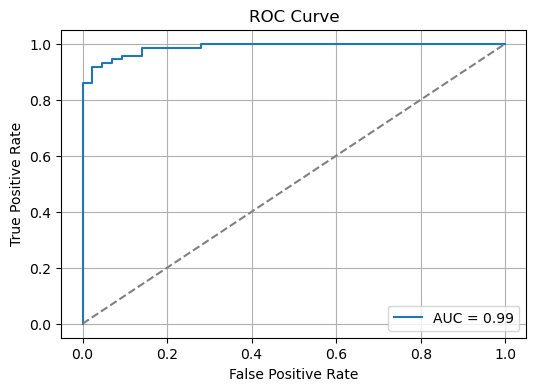

In [6]:
# get probability scores for ROC curve
y_probs = model.predict_proba(X_test)[:, 1]

# generate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Challenge

Recreate your logistic regressor on the `hotel` dataset. Your target variable will be `is_canceled` column, while your predictor will be the `lead_time` column.

After creating your model extract best hyperparameters using both `RandomizedSearchCV` and `GridSearchCV`. Evaluate the accuracy, precision, recall, specificity, F1 Score, and ROC curve of both your predictions.

Answer the analytical questions listed below as well.

In [ ]:
# TODO: Implement the logistic regression model on the `hotel.csv` dataset
...

## Writeup

Answer the analytical questions below using the metrics you've calculated.

1) Did your `RandomizedSearchCV` model contain more precision or recall? Did this lead to greater false negatives or greater false positives? 

...

2) According to the AUC score, did `RandomizedSearchCV` and `GridSearchCV` generate a better model?

...
